# May’s Stability Criterion — Two Benchmark Scenarios

Prior to Robert May's work, it was generally thought that since natural ecosystems are both complex and stable,
stability likely arises from complexity. However, Gardner and Ashby (1970) showed that even simple systems could lose stability with
increasing complexity. May (1972) extended this idea by posing the key question: what is the probability that
a large, randomly assembled community is stable?

Consider a community with $n$ species. Only a fraction $C$ (referred to as connectance) of all possible interactions are nonzero and the strength of these interactions is randomly distributed with standard deviation $\sigma$. How does the likelihood of achieving local stability change as these parameters vary? While we do not provide the mathematical details here, the key mathematical technique May uses in his analysis is random matrix theory - relying on the fact that for a large enough ecosystem, the interactions within the community can be represented by a random matrix whose properties can be analyzed statistically. 

In brief, the ecosystem's dynamics are linearized about a steady state of the species abundances. This means that the deviations from steady state, $\delta \vec{x}$, to first order, obey,

\begin{equation}
\frac{d}{dt}\delta \vec{x} = \hat{J}\, \delta \vec{x}\,,
\end{equation}

where $\hat{J}$ is the species-species interaction matrix near steady state. May derived a stability bound for the ecosystem,
\begin{equation}
\sigma\sqrt{nC} \le 1\,.
\end{equation}
May's criterion rests on random matrix theory results for the eigenvalues of $\hat{J}$, where the criterion tests the probability for an eigenvalue larger than 0 which therefore makes the dynamics unstable.

We contrast **two fixed parameter sets** — one inside, one outside
May’s stability bound.  Each scenario is sampled 1 000 times.

| Scenario | $n$ | $C$ | $\sigma$ | $\sigma\sqrt{nC}$ | May predicts |
|----------:|-----:|----:|---------:|-------------------:|--------------|
| A (green) | 50  | 0.1 | 0.3    | 0.67 | **stable** |
| B (red)   | 150 | 0.1 | 0.3    | 1.16 | **unstable** |

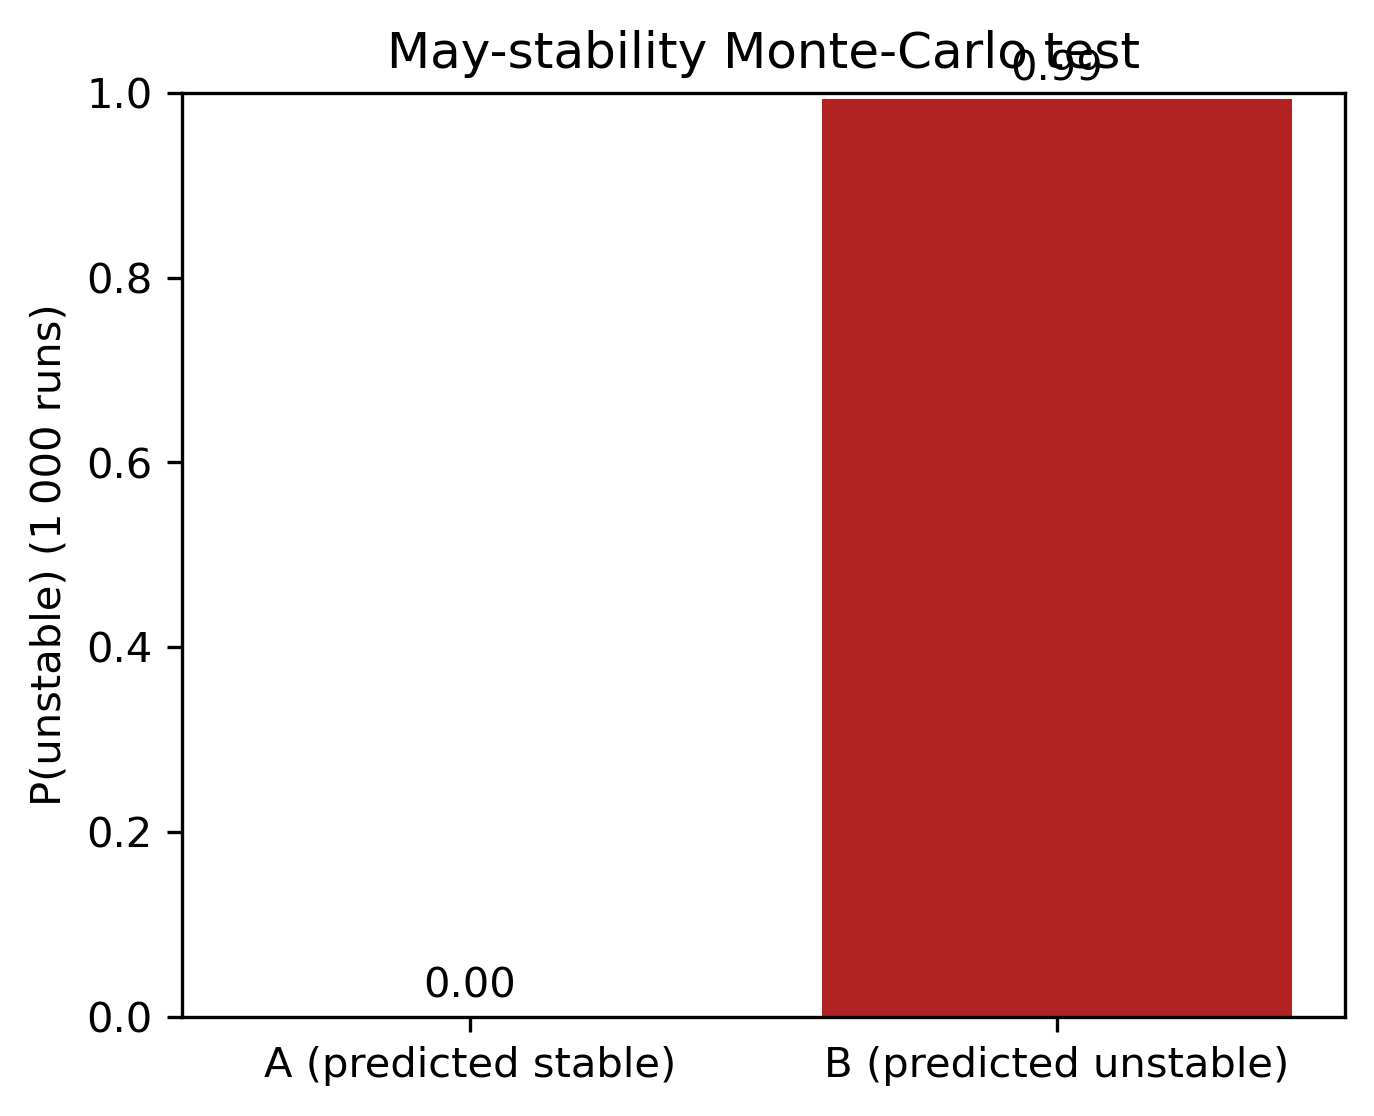

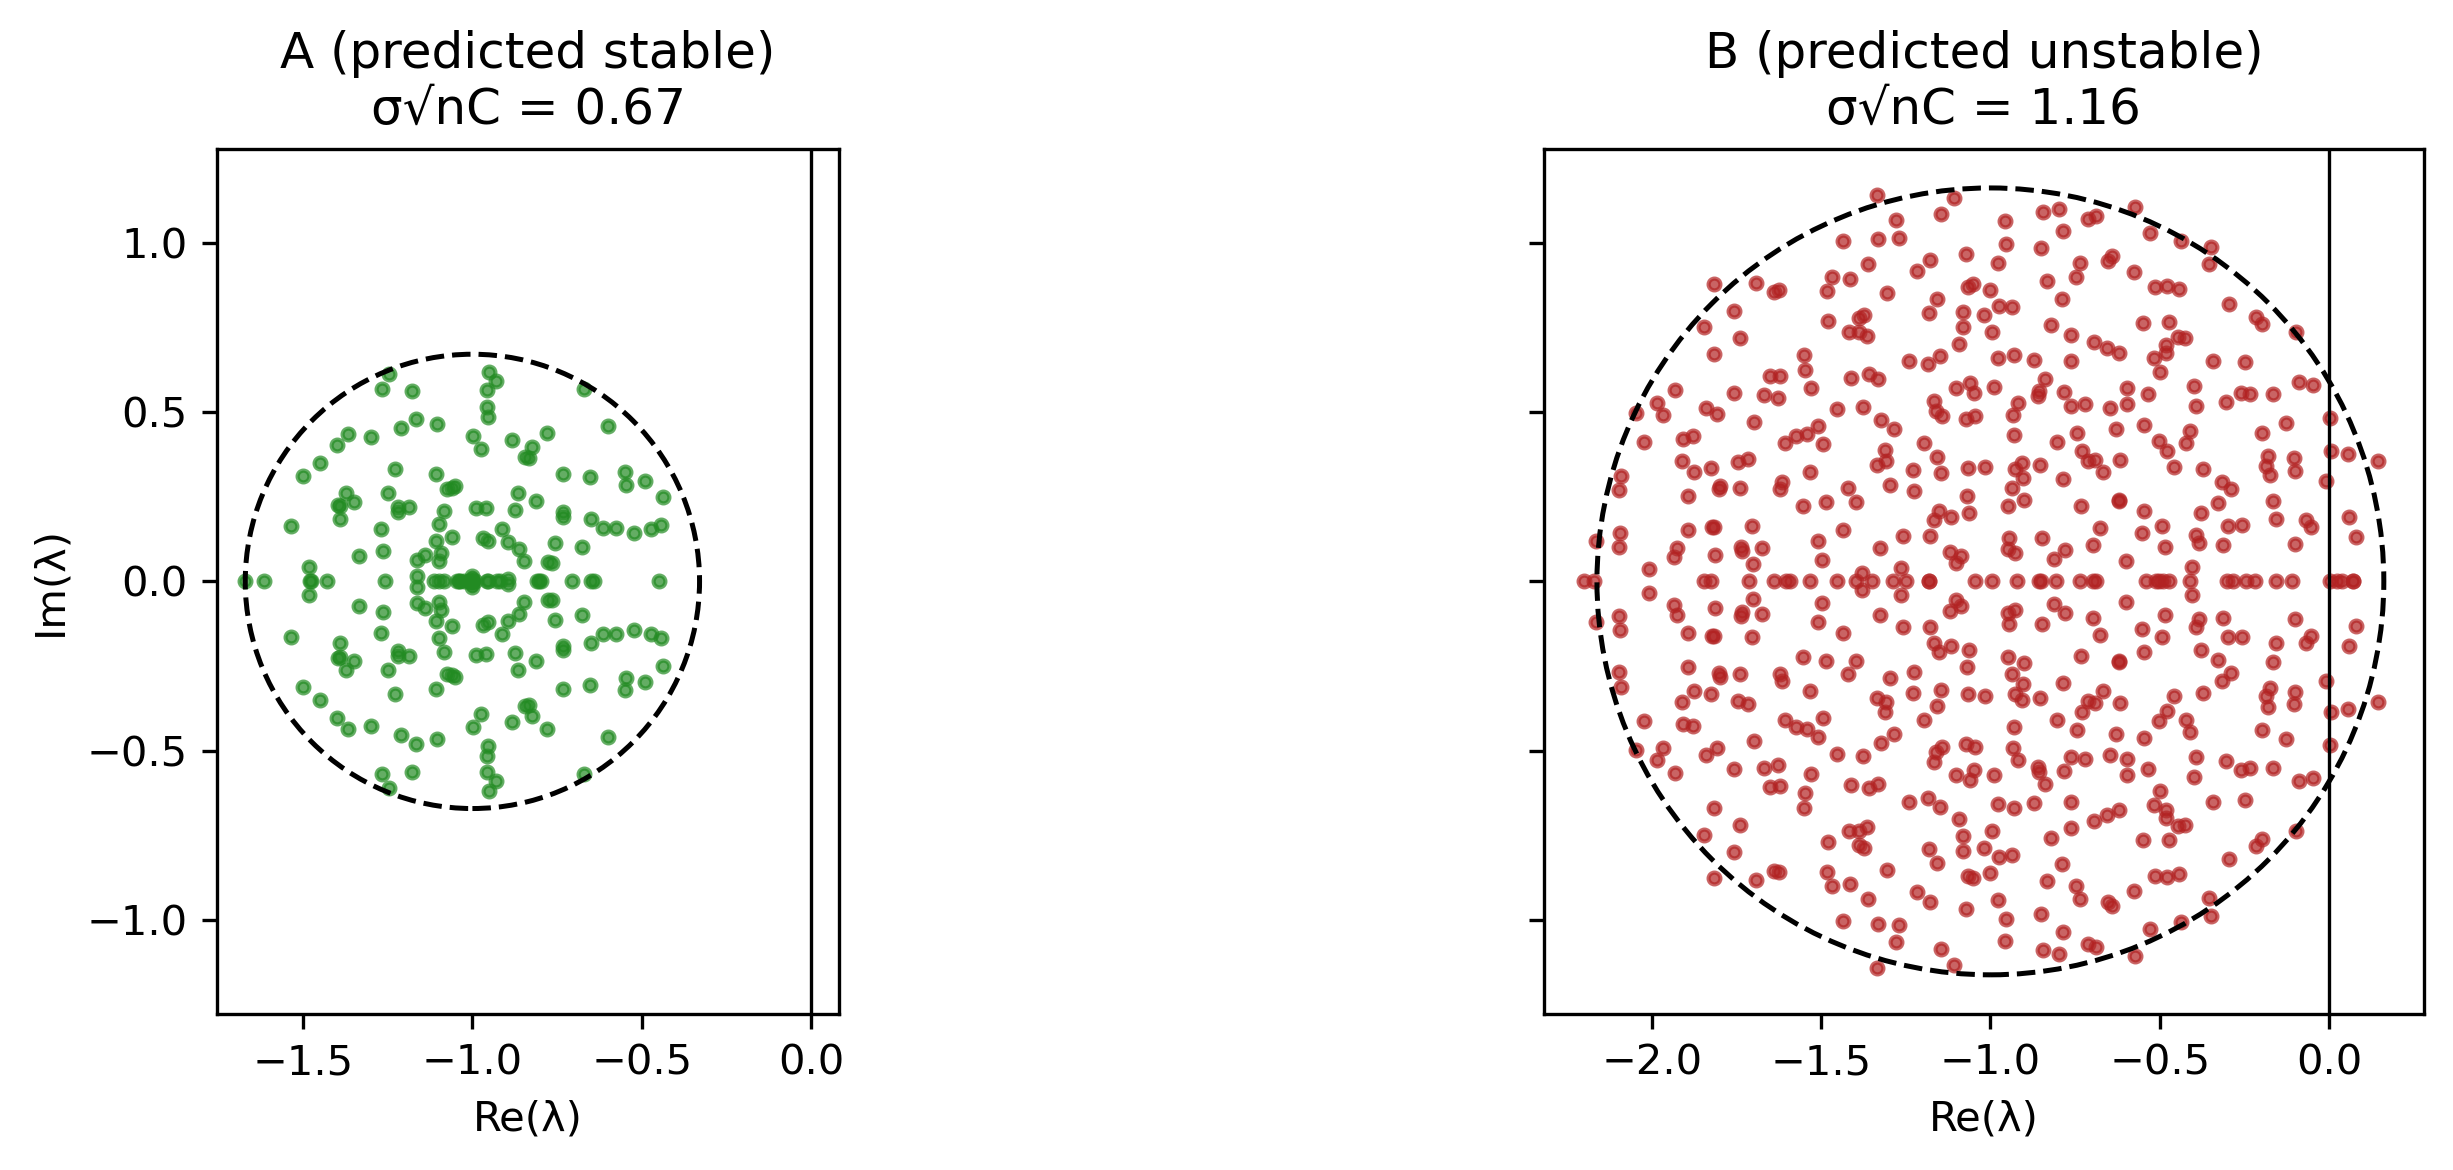

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300

def monte_carlo_prob(n, C, sigma, trials=1000, rng=None):
    rng = np.random.default_rng(rng)
    unstable = 0
    eig_stack = []

    for t in range(trials):
        mask = rng.random((n, n)) < C
        A = rng.normal(0, sigma, (n, n)) * mask
        np.fill_diagonal(A, 0.0)
        J = -np.eye(n) + A

        eigs = np.linalg.eigvals(J)
        if (eigs.real > 0).any():
            unstable += 1
        if t < 4:      # save spectra for first few
            eig_stack.append(eigs)
    return unstable / trials, eig_stack

# Scenario definitions (colour kept separate)
scenarios = {
    "A (predicted stable)": dict(n=50, C=0.10, sigma=0.30, color='forestgreen'),
    "B (predicted unstable)": dict(n=150, C=0.10, sigma=0.30, color='firebrick')
}

results, spectra = {}, {}
for label, pars in scenarios.items():
    prob, eigs = monte_carlo_prob(n=pars['n'], C=pars['C'],
                                  sigma=pars['sigma'])
    results[label] = prob
    spectra[label] = eigs

# ---- Plot probability bar -------------------------------------------------
fig, ax = plt.subplots(figsize=(5,4))
labels = list(results.keys())
values = [results[k] for k in labels]
colors = [scenarios[k]['color'] for k in labels]

ax.bar(labels, values, color=colors)
ax.set_ylim(0,1); ax.set_ylabel('P(unstable) (1 000 runs)')
ax.set_title('May-stability Monte‑Carlo test')
for i,v in enumerate(values):
    ax.text(i, v+0.02, f"{v:.2f}", ha='center')
plt.show()

# ---- Eigenvalue spectra ---------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(11,4), sharey=True)
for ax, label in zip(axes, labels):
    pars = scenarios[label]
    radius = pars['sigma'] * np.sqrt(pars['n'] * pars['C'])
    for eigs in spectra[label]:
        ax.scatter(eigs.real, eigs.imag, s=8, alpha=0.7,
                   color=pars['color'])
    circ = plt.Circle((-1,0), radius, fill=False, ls='--', lw=1.2)
    ax.add_patch(circ)
    ax.axvline(0, color='k', lw=0.8)
    ax.set_title(f"{label}\nσ√nC = {radius:.2f}")
    ax.set_xlabel('Re(λ)')
    ax.set_aspect('equal')
axes[0].set_ylabel('Im(λ)')
plt.tight_layout()
plt.show()

**Interpretation:** Scenario A remains mostly stable as predicted; scenario B
almost always unstable. The eigenvalue clouds lie in a circle of radius
$\sigma\sqrt{nC}$ centred at $(-1,0)$, illustrating May’s geometric
argument

# Why study May's stability bound?

* **Analysis of large ecosystems:** Real ecosystems are often composed of dozens or hundreds of species and capturing such complexity in a model can be difficult. May's random matrix theory approach is a demonstration of how statistical and probabilistic approaches can tame this complexity.
  
* **Understanding interactions:** Inter-population interactions are extremely common in microbial ecosystems and a variety of other contexts. May's stability bound, while not always directly applicable, provides a valuable null model.

* **Translating mathematics to simple insights:** May's analysis provides a striking example of how highly technical mathematical analysis can lead to simple and intuitive results.